In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np

In [52]:
def one_to_one_oracle(s, n):
    """1対1関数のオラクルを作成"""
    oracle = QuantumCircuit(n*2, name="oracle")
    for i in range(n):
        if np.random.rand() > 0.5:
            oracle.x(i)
    for i in range(n):
        oracle.cx(i, i+n)
    return oracle

def two_to_one_oracle(s, n):
    """2対1関数のオラクルを作成"""
    oracle = QuantumCircuit(n*2, name="oracle")
    flag = 0
    for i, si in enumerate(reversed(s)):
        oracle.cx(i, i+n)
        if si=="1" and flag==0:
            oracle.x(i)
            for j, sj in enumerate(reversed(s)):
                if sj == "1":
                    oracle.cx(i, j+n)
            oracle.x(i)
            flag = 1
    return oracle

1001
two_to_one


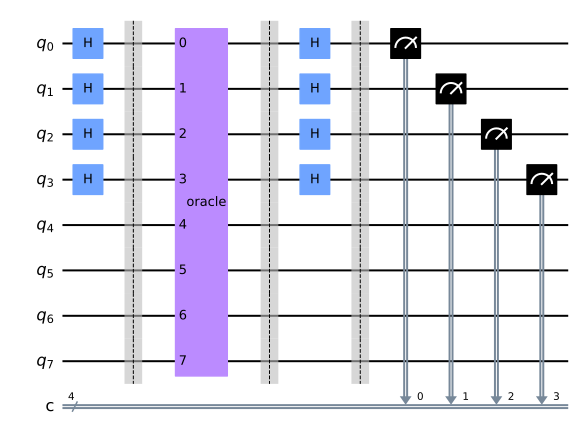

In [64]:
"""量子回路の作成
"""
# sをランダムに作る
n = 4
N = np.random.randint(1, 2**n-1)
s = bin(N)[2:].zfill(n)
s = "1001"
print(s)

# 量子回路作成
# 【初期化】 n*2の量子ビットを準備
qc = QuantumCircuit(n*2, n)

# 【ステップ1】上位nビットにHゲートを適用
for i in range(n):
    qc.h(i)
qc.barrier()

# 【ステップ2】オラクルを決定し、適用する
selected = "two_to_one"
if selected == "two_to_one":
    oracle = two_to_one_oracle(s, n)
elif selected == "one_to_one":
    oracle = one_to_one_oracle(s, n)
print(selected)
qc.append(oracle, range(n*2))
qc.barrier()

# 【ステップ3】再度、上位n量子ビットにHゲートを適用
for i in range(n):
    qc.h(i)
qc.barrier()

# 【ステップ4】測定
for i in range(n):
    qc.measure(i, i)

qc.draw("mpl")

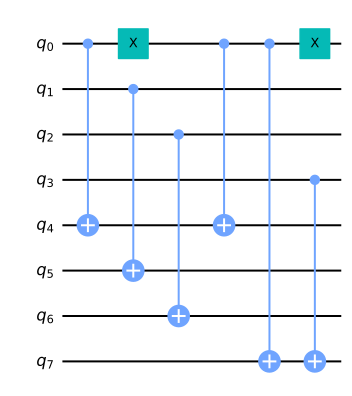

In [54]:
oracle.draw()

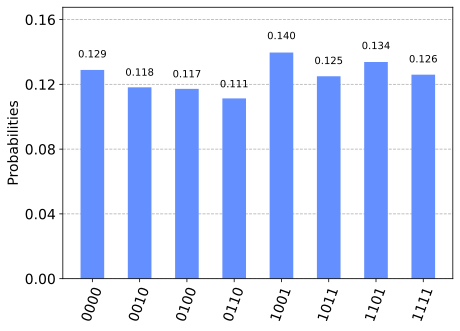

In [55]:
"""実行
"""
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

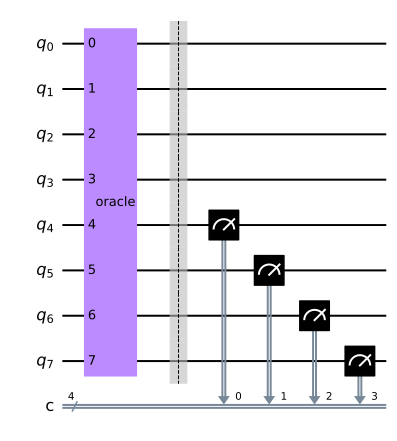

In [59]:
"""求めたsが正しいか確認検証する

オラクルのみの量子回路を作成し、
1. 初期状態|0>
2. 初期状態|s>
を入力した場合で、下位n量子ビットを測定する

* 2対1関数オラクルの場合、結果が等しくなる
* 1対1関数オラクルの場合、結果は等しくならない
"""
# 初期状態|0>で、オラクルだけの回路
qc_0 = QuantumCircuit(n*2, n)

qc_0.append(oracle, range(n*2))
qc_0.barrier()

# 下位nビットを測定する
for i in range(n):
    qc_0.measure(n+i, i)

qc_0.draw()

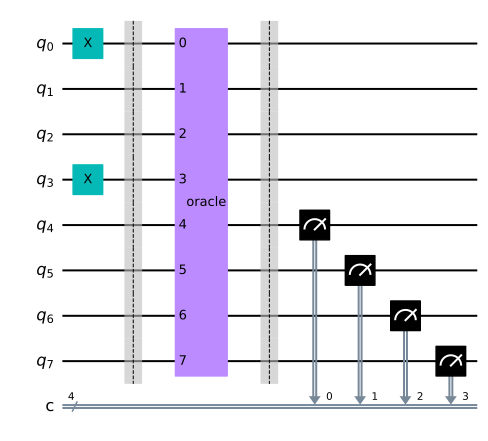

In [60]:
# 初期状態を|s>で、オラクルだけの回路
qc_s = QuantumCircuit(n*2, n)

for i, si in enumerate(reversed(s)):
    if si == "1":
        qc_s.x(i)
qc_s.barrier()

qc_s.append(oracle, range(n*2))
qc_s.barrier()

# 下位nビットを測定する
for i in range(n):
    qc_s.measure(n+i, i)

qc_s.draw()

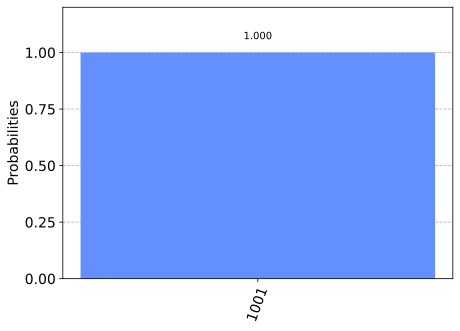

In [61]:
"""qc_0を実行
"""
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc_0, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

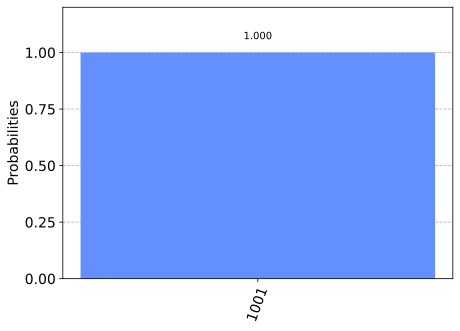

In [62]:
"""qc_sを実行
"""
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc_s, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)